# Homework 5

### Question 1

In [14]:
import numpy as np
import math
import time
from numpy.linalg import norm 
from numpy.linalg import inv 


def evalF(x): 

    F = np.zeros(2)
    
    F[0] = 3*x[0]**2 - x[1]**2
    F[1] = 3*x[0]*x[1]**2 - x[0]**3 - 1
    return F

def evalJ(x): 

    J = np.array([[6*x[0],-2*x[1]], 
        [3*x[1]**2 - 3*x[0]**2, 6*x[0]*x[1]]])
    return J

def qoneA(x0,tol,Nmax):

    mat = np.array([[1./6.,1./18.],[0.,1./6.]])
    for its in range(Nmax):

       F = evalF(x0)
       x1 = x0 - mat.dot(F)
       
       if (norm(x1-x0) < tol):
           xstar = x1
           ier =0
           return[xstar, ier,its]
           
       x0 = x1
    
    xstar = x1
    ier = 1
    return[xstar,ier,its] 

def Newton(x0,tol,Nmax):

    ''' inputs: x0 = initial guess, tol = tolerance, Nmax = max its'''
    ''' Outputs: xstar= approx root, ier = error message, its = num its'''

    for its in range(Nmax):
       J = evalJ(x0)
       Jinv = inv(J)
       F = evalF(x0)
       
       x1 = x0 - Jinv.dot(F)
       
       if (norm(x1-x0) < tol):
           xstar = x1
           ier =0
           return[xstar, ier, its]
           
       x0 = x1
    
    xstar = x1
    ier = 1
    return[xstar,ier,its]


In [15]:
def driver():
    x0 = np.array([1.,1.])
    Nmax = 100
    tol = 1e-10
    
    t = time.time()
    for j in range(50):
      [xstar,ier,its] =  qoneA(x0,tol,Nmax)
    elapsed = time.time()-t
    print(xstar)
    print('a): the error message reads:',ier) 
    print('a): took this many seconds:',elapsed/50)
    print('a): number of iterations is:',its)

In [16]:
driver()

[0.5       0.8660254]
a): the error message reads: 0
a): took this many seconds: 0.0004736995697021484
a): number of iterations is: 33


The matrix we use in this method is simply the inverse of the Jacobian evaulated at the initial guess i.e., this is the Lazy Newton method

In [17]:
def driver():
    x0 = np.array([1.,1.])
    Nmax = 100
    tol = 1e-10
    
    t = time.time()
    for j in range(50):
      [xstar,ier,its] =  Newton(x0,tol,Nmax)
    elapsed = time.time()-t
    print(xstar)
    print('Newton: the error message reads:',ier) 
    print('Newton: took this many seconds:',elapsed/50)
    print('Netwon: number of iterations is:',its)

In [18]:
driver()

[0.5       0.8660254]
Newton: the error message reads: 0
Newton: took this many seconds: 0.0016623401641845702
Netwon: number of iterations is: 5


This converges in significantly less iterations than the method in 1 a)

## Question 3 b)

[1.09364232 1.36032838 1.36032838]
3b): the error message reads: 0
3b): took this many seconds: 0.00021051406860351563
3b): number of iterations is: 4


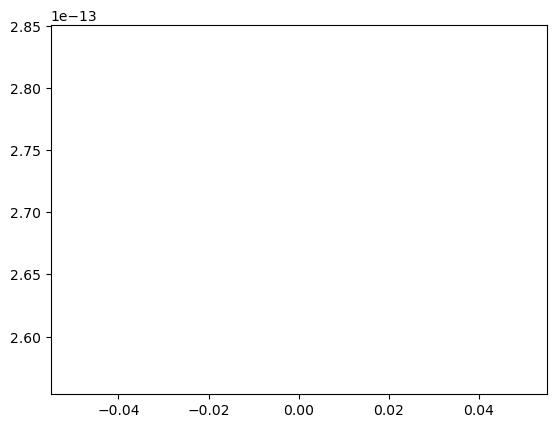

In [20]:
import numpy as np
import math
import time
from numpy.linalg import norm 
from numpy.linalg import inv
from matplotlib import pyplot as plt

def driver():
    x0 = np.array([1.,1.,1.])
    Nmax = 100
    tol = 1e-10
    
    t = time.time()
    for j in range(50):
      [xstar,ier,its,error] =  qthreeB(x0,tol,Nmax)
    elapsed = time.time()-t
    print(xstar)
    print('3b): the error message reads:',ier) 
    print('3b): took this many seconds:',elapsed/50)
    print('3b): number of iterations is:',its)
    plt.plot(list(range(len(error))), error)
    plt.show()
def evalf(x): 

    f = x[0]**2 + 4*x[1]**2 + 4*x[2]**2 - 16
    fx = 2*x[0]
    fy = 8*x[1]
    fz = 8*x[2]
    return f,fx,fy,fz

def qthreeB(x0,tol,Nmax):
     
    for its in range(Nmax):
       f, fx, fy, fz = evalf(x0)
       d = f/(fx**2 + fy**2 + fz**2)
       
       x1 = x0 - np.multiply(d,[fx,fy,fz])
       error = []
       error.append(norm(x1-x0))
       if (norm(x1-x0) < tol):
           xstar = x1
           ier =0
           return[xstar, ier, its,error]
           
       x0 = x1
    
    xstar = x1
    ier = 1
    return[xstar,ier,its,error]
    
driver()
    